In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

from dotenv import find_dotenv, load_dotenv


def load_environment_variables():
    # Find the .env file
    dotenv_path = find_dotenv()
    if not dotenv_path:
        raise FileNotFoundError("Could not find .env file")

    # Load the environment variable from the .env file
    load_dotenv(dotenv_path)

    # Set the working directory to the project root
    project_root = os.path.dirname(dotenv_path)
    os.chdir(project_root)

    # Add the project root to sys.path
    if project_root not in sys.path:
        sys.path.append(project_root)

load_environment_variables()

Python-dotenv could not parse statement starting at line 1


In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True)
data = diabetes["data"]


In [3]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


# Linear Regression model

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, diabetes.target, test_size=0.2, random_state=42)

In [5]:
from myml.linear_model.linear import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [7]:
lr.score(X_test, y_test)

np.float64(0.4560141954834759)

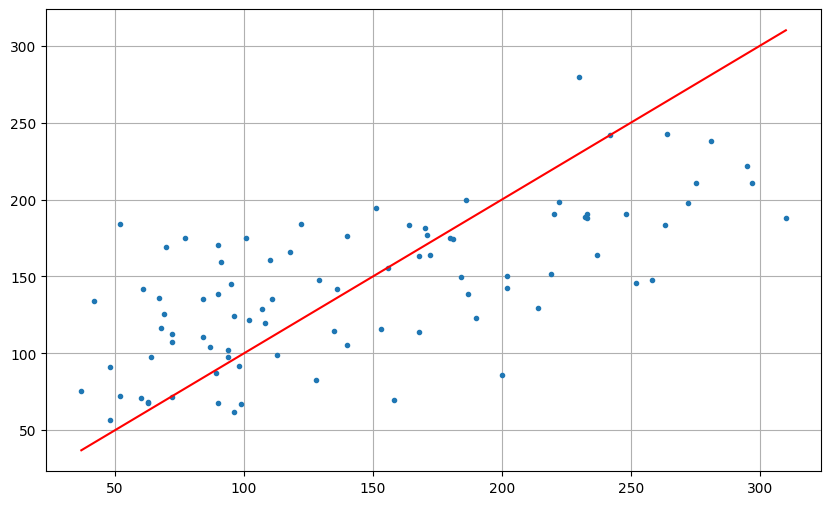

In [17]:
plt.figure(figsize=(10,6))
plt.plot(y_test, pred, ".", label="data points")

min_value = min(*y_test, *pred)
max_value = max(*y_test, *pred)

x = np.linspace(min_value, max_value, 100)
plt.plot(x, x, "-r", label="Perfect prediction")

plt.grid(True)
plt.show()